# Project 2 - Finance    
## Prepared and Submitted By: Saroj Kumar Bisi 07.09.2020

**DESCRIPTION**

**Problem Statement**

 * Finance Industry is the biggest consumer of Data Scientists. It faces constant attack by fraudsters, who try to trick the system. Correctly identifying fraudulent transactions is often compared with finding needle in a haystack because of the low event rate.
 
 * It is important that credit card companies are able to recognize fraudulent credit card transactions so that the customers are not charged for items that they did not purchase. 
 
 * In this project, we are required to try various techniques such as supervised models with oversampling, unsupervised anomaly detection, and heuristics to get good accuracy at fraud detection.

**Dataset Snapshot**
 * The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset represents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
 
 
 * It contains only numerical input variables which are the result of a PCA transformation. 
    Features V1, V2, ... V28 are the principal components obtained with PCA. 
    The only features which have not been transformed with PCA are 'Time' and 'Amount'. 


Downlod the **data sets** from _**[here](https://www.dropbox.com/s/6z5jxcqaqipxiun/Project%202-Finance-Datasets.zip?dl=0)**_.

---

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,accuracy_score,precision_score,recall_score

from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import NearMiss,TomekLinks,ClusterCentroids
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Dense

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

## Project Task: Week 1

**Exploratory Data Analysis (EDA):**

1. Perform an EDA on the dataset
         
    a. Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered 
    (mean) with unit standard deviation.
    
    b. Find if there is any connection between Time, Amount, and the transaction being fraudulent.
    
    
2. Check the class count for each class. It’s a class Imbalance problem. 


3. Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.

    a. Oversampling or undersampling can be used to tackle the class imbalance problem.
    
    b. Oversampling increases the prior probability of imbalanced class and in case of other classifiers, error gets 
    multiplied as the low-proportionate class is mimicked multiple times.
    
    
4. Following are the matrices for evaluating the model performance: Precision, Recall, F1-Score, AUC-ROC curve. Use F1-Score 
    as the evaluation criteria for this project.

### Code :

In [2]:
#import train data
traindata=pd.read_csv('train_data.csv')
#import test data
testdata=pd.read_csv('test_data.csv')
#import test hidden data
test_hiddata=pd.read_csv('test_data_hidden.csv')

In [5]:
traindata.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.04581,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.31862,-0.204963,0.001662,0.037894,49.67,0


In [6]:
testdata.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.042711,-0.335776,-0.807853,-0.05594,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89


In [7]:
test_hiddata.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.335776,-0.807853,-0.05594,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0


In [8]:
print('the shape of train data: ', traindata.shape)
print('the shape of test_hidden data: ', test_hiddata.shape)
print('the shape of test data: ', testdata.shape)

the shape of train data:  (227845, 31)
the shape of test_hidden data:  (56962, 31)
the shape of test data:  (56962, 30)


In [7]:
#Dataset description: 
#test_hidden data and test data is exactly same except for the fact that label information is not present in test data
# For easier data preprocessing we can merge traindata0 and testdata0 together and later split it.

In [3]:
# Since the train0 and train_hidden0 are having same features its worth to merge them together and perform the EDA
#Data merge
dataSet=pd.concat([traindata,test_hiddata])
print('shape of combined data is: ',dataSet.shape)
dataSet.head()

shape of combined data is:  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [9]:
#Check for missing values
dataSet.isnull().sum().sum()

0

#### Checking Mean and Standard Deviation of the latent features
Its seems Value are close to 0 centered (mean) with unit standard deviation.

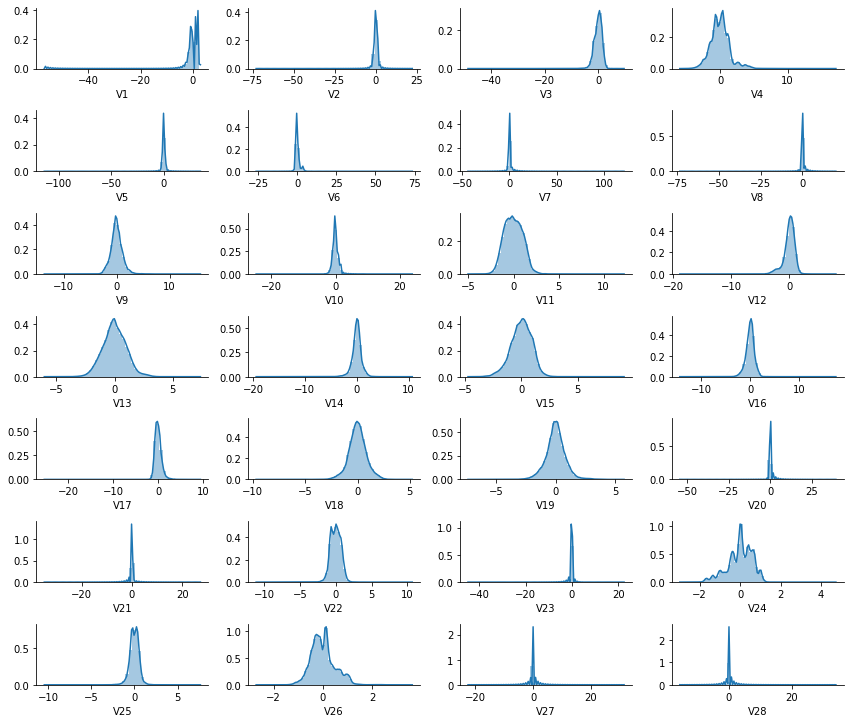

In [9]:
plt.figure(figsize=[12,14])
features=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16',
         'V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
n=1
for f in features:
    plt.subplot(10,4,n)
    sns.distplot(dataSet[f], kde=True)
    sns.despine()
    n=n+1
plt.tight_layout()
plt.show()

In [10]:
features=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16',
         'V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
for f in features:
    print('for feature ',f, 'Mean is ',round(dataSet[f].mean(),2),' and SD is', round(dataSet[f].std(),2))

for feature  V1 Mean is  0.0  and SD is 1.96
for feature  V2 Mean is  0.0  and SD is 1.65
for feature  V3 Mean is  -0.0  and SD is 1.52
for feature  V4 Mean is  0.0  and SD is 1.42
for feature  V5 Mean is  0.0  and SD is 1.38
for feature  V6 Mean is  0.0  and SD is 1.33
for feature  V7 Mean is  -0.0  and SD is 1.24
for feature  V8 Mean is  0.0  and SD is 1.19
for feature  V9 Mean is  -0.0  and SD is 1.1
for feature  V10 Mean is  0.0  and SD is 1.09
for feature  V11 Mean is  0.0  and SD is 1.02
for feature  V12 Mean is  -0.0  and SD is 1.0
for feature  V13 Mean is  0.0  and SD is 1.0
for feature  V14 Mean is  0.0  and SD is 0.96
for feature  V15 Mean is  0.0  and SD is 0.92
for feature  V16 Mean is  0.0  and SD is 0.88
for feature  V17 Mean is  -0.0  and SD is 0.85
for feature  V18 Mean is  0.0  and SD is 0.84
for feature  V19 Mean is  0.0  and SD is 0.81
for feature  V20 Mean is  0.0  and SD is 0.77
for feature  V21 Mean is  0.0  and SD is 0.73
for feature  V22 Mean is  -0.0  and SD is

### Check if there is any connection between Time, Amount, and the transaction being fraudulent

In [11]:
dataSet[['Time','Amount','Class']].corr()

,Time,Amount,Class
Time,1.000000,-0.010596,-0.012323
Amount,-0.010596,1.000000,0.005632
Class,-0.012323,0.005632,1.000000


### Observation
    From above results we can confirm that there is no significant connection between Time, Amount, 
    and the transaction being fraudulent
    These features (Time, Amount) can be dropped off if needed. But for the time being we will considere all features.

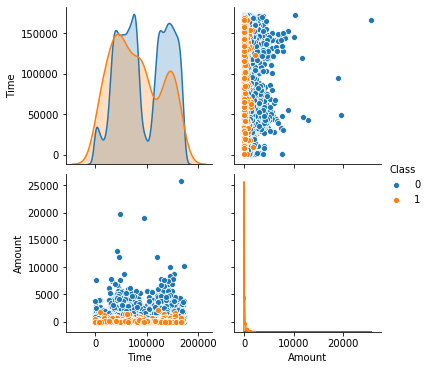

In [12]:
sns.pairplot(dataSet,x_vars=['Time','Amount'],y_vars=['Time','Amount'],kind='scatter',hue='Class')

In [4]:
#Extract features and label
X_train=traindata.drop(columns=['Class']).values
X_train=sc.fit_transform(X_train) # Lets standardize the train data
y_train=traindata['Class'].values

X_test=test_hiddata.drop(columns=['Class']).values
X_test=sc.fit_transform(X_test) # Lets standardize the test data
y_test=test_hiddata['Class'].values
print('the shape of X_train and  y_train: ', X_train.shape, y_train.shape)
print('the shape of X_test and  y_test: ', X_test.shape,y_test.shape)

the shape of X_train and  y_train:  (227845, 30) (227845,)
the shape of X_test and  y_test:  (56962, 30) (56962,)


In [5]:
dataSet.Class.value_counts() # Its a class imbalance problem

0    284315
1       492
Name: Class, dtype: int64

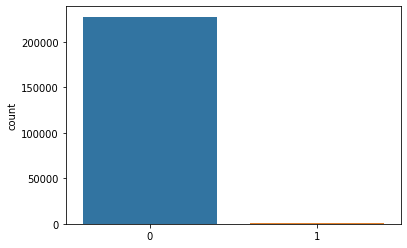

In [6]:
sns.countplot(x=y_train)

#### Week 1 Project Task3: (Tackling Class Imbalance Problem)

### Over Sampling(Applied only on Train Dataset)

length of X_train and y_train before Oversampling 227845 227845
length of X_train and y_train after Oversampling 454902 454902


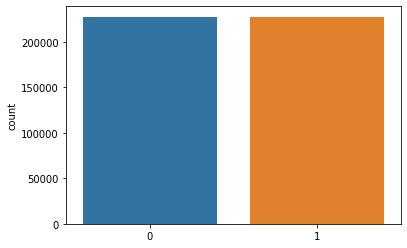

In [8]:
from imblearn.over_sampling import SMOTE
print('length of X_train and y_train before Oversampling',len(X_train),len(y_train))

OS=SMOTE(random_state=42)
X_train_OS,y_train_OS=OS.fit_resample(X_train,y_train)

print('length of X_train and y_train after Oversampling',len(X_train_OS),len(y_train_OS))

#Check for data balance
sns.countplot(x=y_train_OS)

### Under Sampling(Applied only on Train Dataset)

length of X_train and y_train before Undersampling 227845 227845
length of X_train and y_train after Undersampling 788 788


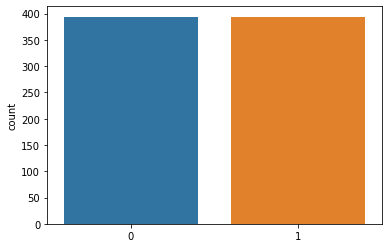

In [10]:
from imblearn.under_sampling import NearMiss,TomekLinks,ClusterCentroids
print('length of X_train and y_train before Undersampling',len(X_train),len(y_train))

US=NearMiss()
X_train_US,y_train_US=US.fit_resample(X_train,y_train)

print('length of X_train and y_train after Undersampling',len(X_train_US),len(y_train_US))


#Check for data balance
sns.countplot(x=y_train_US)

#### Observation:
    1.Verified the latent features and parameters with their mean and standard deviation. Value are close to 0 centered 
    (mean) with around unit standard deviation.
      
    2.From Correlation test we can confirm that there is no significant connection between Time, Amount, 
    and the transaction being fraudulent

## Project Task: Week 2

**Modeling Techniques:**

2. Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best.


2. Use different Tree-based classifiers like Random Forest and XGBoost
         
    a. Remember Tree-based classifiers work on two ideologies: Bagging or Boosting.
    
    b. Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. 
    Random-Forest and XGBboost.Compare the results of 1 with 2 and check if there is any incremental gain.

### Code :

### Approach-1: Use of Naive Bayes classifier with Oversampling Data

In [12]:
#Model building using  Naive Bayes classifier
model_BNB = BernoulliNB()
model_BNB.fit( X_train_OS,y_train_OS)

#Get Train and Test Accuracy Score
train_score=model_BNB.score(X_train_OS,y_train_OS)
test_score=model_BNB.score(X_test,y_test)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

train score is:0.9078944475953062 
test score is:0.9926968856430602 


In [13]:
# Prediction
test_ds_predicted = model_BNB.predict( X_test)
test_ds_predicted[200:500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], d

In [17]:
#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_OS,y_pred=model_BNB.predict( X_train_OS))
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92    227451
           1       0.99      0.82      0.90    227451

    accuracy                           0.91    454902
   macro avg       0.92      0.91      0.91    454902
weighted avg       0.92      0.91      0.91    454902



In [16]:
#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test,y_pred=model_BNB.predict( X_test))
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.79      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      1.00     56962



#### Prepare  roc and auc score

AUC Score is:  0.9568313010347639


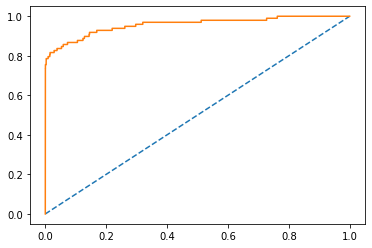

In [18]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calculated using 
#prob values for 1 predicted by model

probabilityValues = model_BNB.predict_proba(X_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

### Approach-2: Use of Naive Bayes classifier with Undersampling Data

In [19]:
#Model building using  Naive Bayes classifier
from sklearn.naive_bayes import BernoulliNB
model_BNB = BernoulliNB()
model_BNB.fit( X_train_US,y_train_US)

#Get Train and Test Accuracy Score
train_score=model_BNB.score(X_train_US,y_train_US)
test_score=model_BNB.score(X_test,y_test)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

train score is:0.9416243654822335 
test score is:0.09165759629226503 


In [20]:
#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_US,y_pred=model_BNB.predict( X_train_US))
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       394
           1       0.98      0.91      0.94       394

    accuracy                           0.94       788
   macro avg       0.94      0.94      0.94       788
weighted avg       0.94      0.94      0.94       788



In [21]:
#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test,y_pred=model_BNB.predict( X_test))
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.09      0.17     56864
           1       0.00      0.88      0.00        98

    accuracy                           0.09     56962
   macro avg       0.50      0.48      0.08     56962
weighted avg       1.00      0.09      0.17     56962



####  Prepare  roc and auc score

AUC Score is:  0.7629512377545278


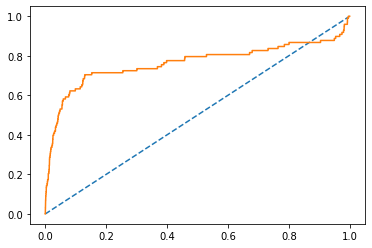

In [22]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model_BNB.predict_proba(X_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

### Approach-3:Use of Logistic Regression with  Oversampling Data

In [23]:
#Model building using  Logistic Regression
model_LR = LogisticRegression()
model_LR.fit( X_train_OS,y_train_OS)

#Get Train and Test Accuracy Score
train_score=model_LR.score(X_train_OS,y_train_OS)
test_score=model_LR.score(X_test,y_test)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

train score is:0.9533284091958268 
test score is:0.9753695446086865 


In [24]:
# Prediction
test_ds_predicted = model_LR.predict( X_test)
test_ds_predicted[200:500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [25]:
#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_OS,y_pred=model_LR.predict( X_train_OS))
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



In [26]:
#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test,y_pred=model_LR.predict( X_test))
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.89      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



#### Prepare  roc and auc score

AUC Score is:  0.9680707926107979


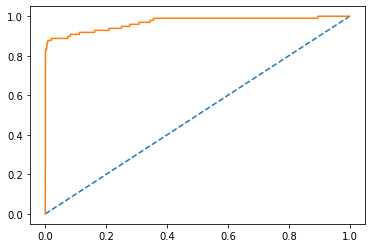

In [27]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model_LR.predict_proba(X_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

### Approach-4: Use of Logistic Regression with Undersampling Data

In [28]:
#Model building using  Logistic Regression
model_LR = LogisticRegression()
model_LR.fit( X_train_US,y_train_US)

#Get Train and Test Accuracy Score
train_score=model_LR.score(X_train_US,y_train_US)
test_score=model_LR.score(X_test,y_test)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

train score is:0.9695431472081218 
test score is:0.5562831361258382 


In [29]:
#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_US,y_pred=model_LR.predict( X_train_US))
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       394
           1       0.98      0.95      0.97       394

    accuracy                           0.97       788
   macro avg       0.97      0.97      0.97       788
weighted avg       0.97      0.97      0.97       788



In [30]:
#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test,y_pred=model_LR.predict( X_test))
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.56      0.71     56864
           1       0.00      0.93      0.01        98

    accuracy                           0.56     56962
   macro avg       0.50      0.74      0.36     56962
weighted avg       1.00      0.56      0.71     56962



#### Prepare  roc and auc score

AUC Score is:  0.876544860347065


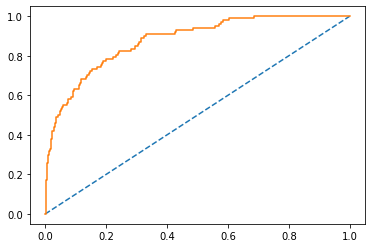

In [31]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model_LR.predict_proba(X_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

### Approach-5: Use of Support Vector Classifier with Oversampling Data


In [46]:
### (As we are Unable to process full train dataset lets take 30% random sample data and test)
sample_traindata= traindata.sample(frac=0.30,random_state=1)
sample_testdata= test_hiddata.sample(frac=0.30,random_state=1)

X_train_SVC=sample_traindata.drop(columns=['Class']).values
X_train_SVC=sc.fit_transform(X_train_SVC) # Lets standardize the train data
y_train_SVC=sample_traindata['Class'].values

X_test_SVC=sample_testdata.drop(columns=['Class']).values
X_test_SVC=sc.fit_transform(X_test_SVC) # Lets standardize the test data
y_test_SVC=sample_testdata['Class'].values

sample_traindata.shape,sample_testdata.shape


((68354, 31), (17089, 31))

length of X_train and y_train before Oversampling 68354 68354
length of X_train and y_train after Oversampling 136442 136442


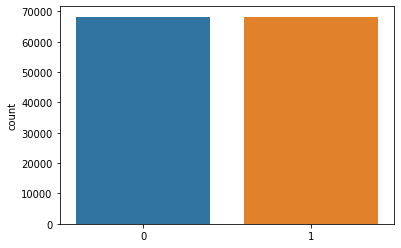

In [47]:
from imblearn.over_sampling import SMOTE
print('length of X_train and y_train before Oversampling',len(X_train_SVC),len(y_train_SVC))

OS=SMOTE(random_state=42)
X_train_SVC_OS,y_train_SVC_OS=OS.fit_resample(X_train_SVC,y_train_SVC)

print('length of X_train and y_train after Oversampling',len(X_train_SVC_OS),len(y_train_SVC_OS))


#Check for data balance
sns.countplot(x=y_train_SVC_OS)

In [48]:
%%time
#Model building using  Support Vector Classifier
model_SVC = SVC()
model_SVC.fit( X_train_SVC_OS,y_train_SVC_OS)

#Get Train and Test Accuracy Score
train_score=model_SVC.score(X_train_SVC_OS,y_train_SVC_OS)
test_score=model_SVC.score(X_test_SVC,y_test_SVC)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

train score is:0.9933304994063411 
test score is:0.9924512844519866 
Wall time: 1min 15s


In [50]:
# Prediction
test_ds_predicted = model_SVC.predict( X_test_SVC)
test_ds_predicted[200:500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [51]:
#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_SVC_OS,y_pred=model_SVC.predict( X_train_SVC_OS))
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     68221
           1       0.99      0.99      0.99     68221

    accuracy                           0.99    136442
   macro avg       0.99      0.99      0.99    136442
weighted avg       0.99      0.99      0.99    136442



In [52]:
#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test_SVC,y_pred=model_SVC.predict( X_test_SVC))
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     17061
           1       0.16      0.82      0.26        28

    accuracy                           0.99     17089
   macro avg       0.58      0.91      0.63     17089
weighted avg       1.00      0.99      1.00     17089



#### Prepare  roc and auc score

AUC Score is:  0.9877623987875439


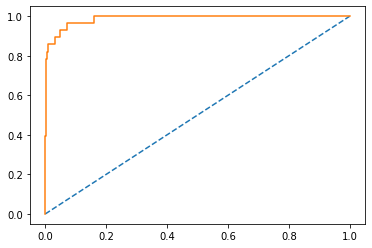

In [53]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model_SVC.decision_function(X_test_SVC)

#Calc AUC
auc = roc_auc_score(y_test_SVC,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test_SVC,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

### Approach-6: Support Vector Classifier with Undersampling Data

In [55]:
#Model building using  Support Vector Classifier
model_SVC = SVC()
model_SVC.fit( X_train_US,y_train_US)

#Get Train and Test Accuracy Score
train_score=model_SVC.score(X_train_US,y_train_US)
test_score=model_SVC.score(X_test,y_test)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

train score is:0.9467005076142132 
test score is:0.9143639619395386 


In [56]:
#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_US,y_pred=model_SVC.predict( X_train_US))
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       394
           1       0.98      0.91      0.94       394

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788



In [58]:
#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test,y_pred=model_LR.predict( X_test))
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.56      0.71     56864
           1       0.00      0.93      0.01        98

    accuracy                           0.56     56962
   macro avg       0.50      0.74      0.36     56962
weighted avg       1.00      0.56      0.71     56962



#### Prepare  roc and auc score

AUC Score is:  0.9490294781390327


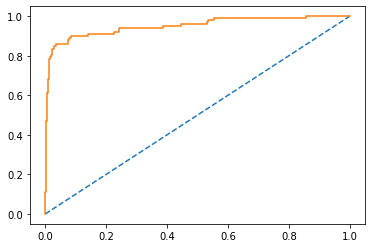

In [59]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model_SVC.decision_function(X_test)

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

### Approach-7 :Use of Tree-based classifiers like Random Forest

In [60]:
#Extract features and label
X_train=traindata.drop(columns=['Class']).values
y_train=traindata['Class'].values

X_test=test_hiddata.drop(columns=['Class']).values
y_test=test_hiddata['Class'].values
print('the shape of X_train and  y_train: ', X_train.shape, y_train.shape)
print('the shape of X_test and  y_test: ', X_test.shape,y_test.shape)

the shape of X_train and  y_train:  (227845, 30) (227845,)
the shape of X_test and  y_test:  (56962, 30) (56962,)


In [61]:
%%time
#class_weight : {"balanced", "balanced_subsample"}
# Model building using Random Forest classifier
model_RFC=RandomForestClassifier(class_weight='balanced')
model_RFC.fit( X_train,y_train)

#Get Train and Test Accuracy Score
train_score=model_RFC.score(X_train,y_train)
test_score=model_RFC.score(X_test,y_test)
print('train score is:{} and test score is: {}'.format(train_score,test_score))

train score is:1.0 and test score is: 0.9994733330992591
Wall time: 1min 22s


In [62]:
%%time
#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train,y_pred=model_RFC.predict( X_train))
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Wall time: 1.68 s


In [63]:
%%time
#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test,y_pred=model_RFC.predict( X_test ))
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.72      0.83        98

    accuracy                           1.00     56962
   macro avg       0.98      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Wall time: 371 ms


#### Prepare  roc and auc score

AUC Score is:  0.9373524944586725


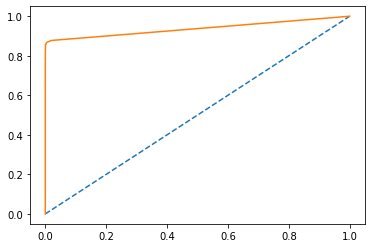

In [54]:
#ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model_RFC.predict_proba(X_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

### Approach-8 :Use of Tree-based classifiers XGBoost

In [104]:
%%time

# Model building using XGBoost Classifier
model_XGBC=XGBClassifier(scale_pos_weight=99)
model_XGBC.fit( X_train,y_train)

#Get Train and Test Accuracy Score
train_score=model_XGBC.score(X_train,y_train)
test_score=model_XGBC.score(X_test,y_test)
print('train score is:{} and test score is: {}'.format(train_score,test_score))

#Note:The XGBoost documentation suggests a fast way to estimate scale_pos_weight value 
#using the training dataset as the total number of examples in the majority class 
#divided by the total number of examples in the minority class

train score is:1.0 and test score is: 0.9994733330992591
Wall time: 30.5 s


In [105]:
#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train,y_pred=model_XGBC.predict( X_train ))
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [106]:
#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test,y_pred=model_XGBC.predict( X_test ))
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



#### Prepare  roc and auc score

AUC Score is:  0.9774268071043837


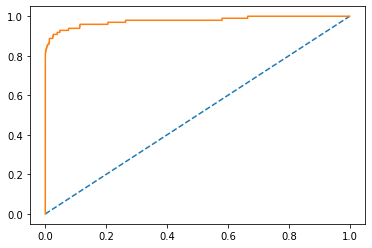

In [107]:
#ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model_XGBC.predict_proba(X_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

#### Observation:

**Summary of Model Testing and Evaluation at end of Week-2**

| Approach | Avg. F-1 Score(Train) | Avg. F-1 Score(Test) | Wt.Avg. F-1 Score(Test) | Accuracy(Test) |
| :--- | :---: | :---: | :---: | :---: |
| 1. Oversampling - Naive Bayes | 91 % | 63 % | 100 % | 99 % |
| 2. Undersampling - Naive Bayes | 94 % | 8 % | 17 % | 9 % |
| 3. Over Sampling - Logistic Regression | 95 % | 55 % | 99 % | 98 % |
| 4. Under Sampling - Logistic Regression | 97 % | 36 % | 71 % | 56 % |
| 5. Oversampling - SVC | 99 % | 63 % | 100 % | 99 % |
| 6. Undersampling - SVC | 95 % | 36 % | 71 % | 56 % |
| 7. Tree-based classifier- Random Forest | 100 % | 91 % | 100 % | 100 % |
| 8. Tree-based classifier- XGBoost | 100 % | 92 % | 100 % | 100 % |



---
**Note**: From above test it shows that the best performing models are Trees based classifiers.


## Project Tasks: Week 3
    1. Use ANN (Artificial Neural Network) to identify fradulent and non-fradulent.

       a)    Fine-tune number of layers
       b)    Number of Neurons in each layers
       c)    Experiment in batch-size
       d)    Experiment with number of epochs. Check the observations in loss and accuracy
       e)    Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
       f)    Find out which activation performs best for this use case and why?
       g)    Check Confusion Matrix, Precision, Recall and F1-Score
       
    2. Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction 
    models from above.       
      
    3. Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use
      techniques like Grid Search, Cross-Validation and Random search.

### Code :

In [57]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Dense

In [76]:
#Prepare Data
#Extract features and label
X_train=traindata.drop(columns=['Class']).values
y_train=traindata['Class'].values
#X_train=X_train_OS
#y_train=y_train_OS

X_test=test_hiddata.drop(columns=['Class']).values
y_test=test_hiddata['Class'].values
print('the shape of X_train and  y_train: ', X_train.shape, y_train.shape)
print('the shape of X_test and  y_test: ', X_test.shape,y_test.shape)

the shape of X_train and  y_train:  (227845, 30) (227845,)
the shape of X_test and  y_test:  (56962, 30) (56962,)


In [77]:
%%time
#Build a sequential model
tf.keras.backend.clear_session()

#Initialize Sequential model
model_NN = tf.keras.models.Sequential()
#Input Layer
model_NN.add(tf.keras.layers.Reshape((30,),input_shape=(30,)))
#Normalize the data
model_NN.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model_NN.add(tf.keras.layers.Dense(100, activation='relu'))
#Dropout layer
model_NN.add(tf.keras.layers.Dropout(0.5))
#Normalize the data
model_NN.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model_NN.add(tf.keras.layers.Dense(50, activation='relu'))
#Dropout layer
model_NN.add(tf.keras.layers.Dropout(0.3))
#Normalize the data
model_NN.add(tf.keras.layers.BatchNormalization())

#Add OUTPUT layer
model_NN.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Create optimizer with non-default learning rate
#sgd_optimizer = tf.keras.optimizers.SGD(lr=1.0)
#model_NN.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Compile the model
model_NN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#model_NN.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Wall time: 345 ms


In [78]:
%%time
## Train the model with imbalance data
model_NN.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=10,
          batch_size=32)

Train on 227845 samples, validate on 56962 samples
Epoch 1/10
227845/227845 [==============================] - 42s 185us/sample - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0209 - val_accuracy: 0.9993
Epoch 2/10
227845/227845 [==============================] - 39s 173us/sample - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0251 - val_accuracy: 0.9993
Epoch 3/10
227845/227845 [==============================] - 40s 175us/sample - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0247 - val_accuracy: 0.9993
Epoch 4/10
227845/227845 [==============================] - 40s 175us/sample - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0257 - val_accuracy: 0.9993
Epoch 5/10
227845/227845 [==============================] - 39s 173us/sample - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0684 - val_accuracy: 0.9992
Epoch 6/10
227845/227845 [==============================] - 39s 172us/sample - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0831 - val_accuracy: 0.9993
Epoch 7/10
227845/227845 [=====

In [79]:
%%time
# predict  classes
yhat_classes_train = model_NN.predict_classes(X_train, verbose=0)
yhat_classes_test = model_NN.predict_classes(X_test, verbose=0)

# reduce the output to 1d array
yhat_classes_train = yhat_classes_train[:, 0]
yhat_classes_test = yhat_classes_test[:, 0]

#Accuracy Score for train Data
accuracy_score_train=accuracy_score(y_true=y_train,y_pred=yhat_classes_train)
#Accuracy Score for test Data
accuracy_score_test=accuracy_score(y_true=y_test,y_pred=yhat_classes_test)
print('Train Accuracy score is: {} and Test Accuracy score is: {}'.format(accuracy_score_train,accuracy_score_test))
print('----------------')
print('----------------')

#Confusion Matrix  for train Data
cm=confusion_matrix(y_true=y_train,y_pred=yhat_classes_train)
print('Confusion Matrix for Train Data \n',cm)
print('----------------')
print('----------------')

#Confusion Matrix Report for Test Data
cm=confusion_matrix(y_true=y_test,y_pred=yhat_classes_test)
print('Confusion Matrix for Test Data \n',cm)
print('----------------')
print('----------------')


#Classification Report for Train Data
cr=classification_report(y_true=y_train,y_pred=yhat_classes_train)
print('Classification Report for Train Data \n',cr)



#Classification Report for Test Data
cr=classification_report(y_true=y_test,y_pred=yhat_classes_test)
print('Classification Report for Test Data \n',cr)


Train Accuracy score is: 0.9993855471921701 and Test Accuracy score is: 0.9993153330290369
----------------
----------------
Confusion Matrix for Train Data 
 [[227386     65]
 [    75    319]]
----------------
----------------
Confusion Matrix for Test Data 
 [[56848    16]
 [   23    75]]
----------------
----------------
Classification Report for Train Data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.83      0.81      0.82       394

    accuracy                           1.00    227845
   macro avg       0.92      0.90      0.91    227845
weighted avg       1.00      1.00      1.00    227845

Classification Report for Test Data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.77      0.79        98

    accuracy                           1.00     56962
   macro avg       0.91      0.88      0.90     5696

### Observation

In [62]:
# Training and Validation Observations of Neural Network with Original Train Data
# Num of Layers        batch size     Epochs     optimizer         Train Accuracy   Test Accuracy   f1.Score(Test)
#       1                  32           10          SGD(lr=0.01)        99.92 %           99.91 %        88.0 %
#       2                  32           10          SGD(lr=0.01)        99.81 %           99.80 %        80.0 %
#       2                  32           10          SGD(lr=0.1)         99.91 %           99.89 %        87.0 %
#       2                  32           10          SGD(lr=0.5)         99.95 %           99.93 %        90.0 %
#       2                  32           10          SGD(lr=1.0)         99.94 %           99.93 %        90.0 %
#       1                  32           10          Adam                99.93 %           99.91 %        88.0 %
#       2                  32           10          Adam                99.95 %           99.93 %        91.00 %
#       2                  32           10          rmsprop             99.93 %           99.92 %        89.0 %
# 2-With Dropout           32           10          SGD(lr=0.01)        99.97 %           99.92 % 
# 2-With Dropout           32           10          Adam                99.93 %           99.93 %        90.0 %  
# 2-With Dropout           32           10          rmsprop             99.88 %           99.88 %        84.0 %


# Training and Validation Observations of Neural Network with Oversample Train Data
# Num of Layers        batch size     Epochs        optimizer         Train Accuracy   Test Accuracy   f1.Score(Test)
# 2-WithoutDropout          32           10          Adam                99.88 %           99.82 %        50.0 %  
# 2-WithDropout             32           10          Adam                98.80 %           99.82 %        50.0 %  

#CONCLUSION from ANN (Artificial Neural Network) Training and Testing results:
# Among various options tried with combinations of No of Layers, Optimizer, learning rates and Dropout Strategy,
# it is observed that a Two hidden layer with Adam as the optimizer is the best possible model 
# with Train Accuracy Score=99.90%, Test Accuracy Score= 99.88% and Test F1 score= 91% 

#### Observation:

**Summary of Model Testing and Evaluation at end of Week-2**

| Approach | Avg. F-1 Score(Train) | Avg. F-1 Score(Test) | Wt.Avg. F-1 Score(Test) | Accuracy(Test) |
| :--- | :---: | :---: | :---: | :---: |
| 1. Oversampling - Naive Bayes | 91 % | 89 % | 89 % | 89 % |
| 2. Undersampling - Naive Bayes | 94 % | 89 % | 89 % | 89 % |
| 3. Over Sampling - Logistic Regression | 95 % | 94 % | 94 % | 94 % |
| 4. Under Sampling - Logistic Regression | 97 % | 96 % | 96 % | 96 % |
| 5. Oversampling - SVC | 100 % | 94 % | 94 % | 94 % |
| 6. Undersampling - SVC | 95 % | 96 % | 96 % | 96 % |
| 7. Tree-based classifier- Random Forest | 100 % | 91 % | 100 % | 100 % |
| 8. Tree-based classifier- XGBoost | 100 % | 92 % | 100 % | 99.98 % |
| 9. Neural Network | 91 % | 90 % | 100 % | 99.93 % |



---
**Note**: From above test it shows that the best performing models are Trees based classifiers followed by Neural Network.


### Lets do Cross validation and see if there is any improvement in the score
    Here are the steps for CV 
    Step1: Cross validate with StratifiedKFold with 5 splits 
    Step2: Identify which splits(among 5 splits) gives the best Train and Test sample
    Step3: Extract the best Sample and Refit the model with the best train sample
    Step4: Predict with Unseen Test Data and find out Classification report

In [80]:
COLUMN_NAMES = ["Approach","Model Name", "F1 Scores","Range of F1 Scores","Std Deviation of F1 Scores"]
df_model_selection = pd.DataFrame(columns=COLUMN_NAMES)


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
#from sklearn import metrics

def model_traintest_CV(model_obj, model_name, approach, n_splits, X, y):
    global df_model_selection
    
    skf = StratifiedKFold(n_splits, random_state=12,shuffle=True)
    
    weighted_f1_score = []
    
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index]
        
        model_obj.fit(X_train,y_train,epochs=10,batch_size=32,verbose=0)
        # predict  classes
        yhat_classes_train = model_obj.predict_classes(X_train, verbose=0)
        yhat_classes_test = model_obj.predict_classes(X_test, verbose=0)

        # reduce the output to 1d array
        yhat_classes_train = yhat_classes_train[:, 0]
        yhat_classes_test = yhat_classes_test[:, 0]
        
        #Accuracy Score for train Data
        #accuracy_score_train=accuracy_score(y_true=y_train,y_pred=yhat_classes_train)
        
        #test_ds_predicted = model_obj.predict( X_test )
        
        weighted_f1_score.append(round(f1_score(y_true=y_test, y_pred=yhat_classes_test , average='weighted'),2))   
         
    sd_weighted_f1_score = np.std(weighted_f1_score, ddof=1)
    range_of_f1_scores = "{}-{}".format(min(weighted_f1_score),max(weighted_f1_score))    
    df_model_selection = pd.concat([df_model_selection,pd.DataFrame([[approach,model_name,sorted(weighted_f1_score),range_of_f1_scores,sd_weighted_f1_score]], columns =COLUMN_NAMES) ])


In [83]:
%%time
X=X_train
y=y_train
n_splits=5
approach='Neural Network'
model_obj=model_NN
model_name='Neural Network'
model_traintest_CV(model_obj, model_name, approach, n_splits, X, y)
df_model_selection

Wall time: 9min


,Approach,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Neural Network,Neural Network,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.0-1.0,0.0


#### Step2: Identify which splits(among 5 splits) gives the best Train and Test sample

In [84]:
%%time
# Now lets try to get the Scores using StratifiedKFold Cross Validation for Neural Network

#Initialize the algo
model_obj=model_NN
X=X_train
y=y_train

#Initialize StratifiedKFold Method
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits, random_state=12,shuffle=True)


#Initialize For Loop 

i=0
for train,test in kfold.split(X,y):
    i = i+1
    X_train,X_test = X[train],X[test]
    y_train,y_test = y[train],y[test]
    
    model_obj.fit(X_train,y_train,epochs=10,batch_size=32,verbose=0)
    # predict  classes
    yhat_classes_train = model_obj.predict_classes(X_train, verbose=0)
    yhat_classes_test = model_obj.predict_classes(X_test, verbose=0)

    # reduce the output to 1d array
    yhat_classes_train = yhat_classes_train[:, 0]
    yhat_classes_test = yhat_classes_test[:, 0]
    
    test_f1_score=round(f1_score(y_true=y_test, y_pred=yhat_classes_test , average='weighted'),2)
    train_f1_score=round(f1_score(y_true=y_train, y_pred=yhat_classes_train , average='weighted'),2)
    
    #print("Train Score: {}, Test score: {}, for Sample Split: {}".format(model.score(X_train,y_train),model.score(X_test,y_test),i))
    print("Train f1-Score: {}, Test f1-score: {}, for Sample Split: {}".format(train_f1_score,test_f1_score,i))

Train f1-Score: 1.0, Test f1-score: 1.0, for Sample Split: 1
Train f1-Score: 1.0, Test f1-score: 1.0, for Sample Split: 2
Train f1-Score: 1.0, Test f1-score: 1.0, for Sample Split: 3
Train f1-Score: 1.0, Test f1-score: 1.0, for Sample Split: 4
Train f1-Score: 1.0, Test f1-score: 1.0, for Sample Split: 5
Wall time: 8min 47s


#### Step3: Extract the best Sample and Refit the model with the best train sample

In [86]:
%%time
#Lets extract the Train and Test sample for split 2
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=0
for train,test in kfold.split(X,y):
    i = i+1
    if i == 2:
        X_train,X_test,y_train,y_test = X[train],X[test],y[train],y[test]

model_obj.fit(X_train,y_train,epochs=10,batch_size=32,verbose=0)

Wall time: 1min 49s


#### Step4: Predict with Unseen Test Data and find out Classification report

In [89]:
%%time
X_test=test_hiddata.drop(columns=['Class']).values # Unseen data
y_test=test_hiddata['Class'].values                # Unseen data

# predict  classes
yhat_classes_train = model_obj.predict_classes(X_train, verbose=0)
yhat_classes_test = model_obj.predict_classes(X_test, verbose=0)

# reduce the output to 1d array
yhat_classes_train = yhat_classes_train[:, 0]
yhat_classes_test = yhat_classes_test[:, 0]

#Accuracy Score for train Data
accuracy_score_train=accuracy_score(y_true=y_train,y_pred=yhat_classes_train)
#Accuracy Score for test Data
accuracy_score_test=accuracy_score(y_true=y_test,y_pred=yhat_classes_test)
print('Train Accuracy score is: {} and Test Accuracy score is: {}'.format(accuracy_score_train,accuracy_score_test))
print('----------------')
print('----------------')

#Confusion Matrix  for train Data
cm=confusion_matrix(y_true=y_train,y_pred=yhat_classes_train)
print('Confusion Matrix for Train Data \n',cm)
print('----------------')
print('----------------')

#Confusion Matrix Report for Test Data
cm=confusion_matrix(y_true=y_test,y_pred=yhat_classes_test)
print('Confusion Matrix for Test Data \n',cm)
print('----------------')
print('----------------')


#Classification Report for Train Data
cr=classification_report(y_true=y_train,y_pred=yhat_classes_train)
print('Classification Report for Train Data \n',cr)



#Classification Report for Test Data
cr=classification_report(y_true=y_test,y_pred=yhat_classes_test)
print('Classification Report for Test Data \n',cr)

Train Accuracy score is: 0.9994129781210911 and Test Accuracy score is: 0.9993328885923949
----------------
----------------
Confusion Matrix for Train Data 
 [[181909     52]
 [    55    260]]
----------------
----------------
Confusion Matrix for Test Data 
 [[56850    14]
 [   24    74]]
----------------
----------------
Classification Report for Train Data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    181961
           1       0.83      0.83      0.83       315

    accuracy                           1.00    182276
   macro avg       0.92      0.91      0.91    182276
weighted avg       1.00      1.00      1.00    182276

Classification Report for Test Data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.76      0.80        98

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     5696

### Observation
    After cross validation of Neural Network, there is no significant change in the performance of the model. There is 
    however marginal improvement in Precision and f1-score of Test Data.

## Anomaly detection using Isolation Forest and Local Outlier Factor

In [122]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [123]:
## Take some sample of the data since processing time is huge

#traindata1= traindata.sample(frac = 1,random_state=1)
#testdata1= test_hiddata.sample(frac = 1,random_state=1)
testdata1= test_hiddata
traindata1= traindata
print('traindata1.shape',traindata1.shape)
print('testdata1.shape',testdata1.shape)

traindata1.shape (227845, 31)
testdata1.shape (56962, 31)


In [124]:
#Determine the number of fraud and valid transactions in the dataset
Fraud = traindata1[traindata1['Class']==1]

Valid = traindata1[traindata1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

#Extract features and label
X_train=traindata1.drop(columns=['Class'])
y_train=traindata1['Class']

X_test=testdata1.drop(columns=['Class'])
y_test=testdata1['Class']
print('the shape of X_train and  y_train: ', X_train.shape, y_train.shape)
print('the shape of X_test and  y_test: ', X_test.shape,y_test.shape)
# Define a random state 
state = np.random.RandomState(42)

0.0017322412299792043
Fraud Cases : 394
Valid Cases : 227451
the shape of X_train and  y_train:  (227845, 30) (227845,)
the shape of X_test and  y_test:  (56962, 30) (56962,)


In [125]:
%%time
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X_train), 
                                       contamination=outlier_fraction,random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction,novelty=True)
   
}


# Model Training and Testing
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf.fit(X_train)
        y_pred = clf.predict(X_train)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_train)
        y_pred = clf.predict(X_train)
    else:    
        clf.fit(X_train)
        scores_prediction = clf.decision_function(X_train)
        y_pred = clf.predict(X_train)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_train).sum()
    # Run Classification Metrics
    print("{}: {} Errors".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_train,y_pred))
    print("Classification Report :")
    print(classification_report(y_train,y_pred))

Isolation Forest: 519 Errors
Accuracy Score :
0.9977221356624021
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.34      0.34      0.34       394

    accuracy                           1.00    227845
   macro avg       0.67      0.67      0.67    227845
weighted avg       1.00      1.00      1.00    227845

Local Outlier Factor: 647 Errors
Accuracy Score :
0.9971603502381005
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.07      0.05      0.06       394

    accuracy                           1.00    227845
   macro avg       0.53      0.52      0.53    227845
weighted avg       1.00      1.00      1.00    227845

Wall time: 1min 3s


In [126]:
%%time
#Lets take Isolation Forest as the final model and predict the scores,missclassification error etc.
model_iforest=IsolationForest(n_estimators=200, 
                           max_samples=len(X_train),
                           contamination=outlier_fraction,
                           random_state=state
                          )
model_iforest.fit(X_train)
y_pred_train=model_iforest.predict(X_train) # Predict Train data
y_pred_test=model_iforest.predict(X_test)   # Predict Test data

#Reshape the prediction values to 0 for Non-Fraud , 1 for Fraud transactions for Train
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train == -1] = 1

#Reshape the prediction values to 0 for Non-Fraud , 1 for Fraud transactions for Test
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1

Wall time: 1min 10s


### Predict Train Data

In [127]:
%%time
#Predict the Class
Predicted_Class=pd.DataFrame(data=y_pred_train,columns=['Predicted_Class'])# convert the Predicted_Class to a dataframe
iforest_prediction_train=pd.concat([traindata1,Predicted_Class],axis=1)# append the score column to the original  data

#Find the misclassification error
n_errors = (y_pred_train != y_train).sum()
print('number of missclassification error  is: {}'.format(n_errors))

#Predict the Scores
train_scores=model_iforest.decision_function(X_train) # Predict the scores
train_scores=pd.DataFrame(data=train_scores,columns=['Scores'])# convert the scores to dataframe
iforest_prediction_train=pd.concat([iforest_prediction_train,train_scores],axis=1)# append the score column to the original  data

number of missclassification error  is: 527
Wall time: 24.6 s


### Confusion Matrix and  and Classification Report for Train Data

In [128]:
print("Confusion Matrix : ")
print(confusion_matrix(y_train,y_pred_train))
print("Classification Report :")
print(classification_report(y_train,y_pred_train))

Confusion Matrix : 
[[227187    264]
 [   263    131]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.33      0.33      0.33       394

    accuracy                           1.00    227845
   macro avg       0.67      0.67      0.67    227845
weighted avg       1.00      1.00      1.00    227845



In [129]:
iforest_prediction_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted_Class,Scores
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0,0,0.191107
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0,0,0.166320
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0,0,0.170325
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0,0,0.196440
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0,0,0.190288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,62074.0,-1.993953,1.734986,-1.108037,-2.671817,1.605319,3.041992,-0.417771,1.438007,0.945437,...,0.047110,1.008409,0.234363,0.768581,0.697625,0.354542,14.83,0,0,0.178712
227841,32193.0,-0.440396,1.062920,1.582218,-0.029761,0.040967,-0.903627,0.730326,-0.108175,-0.513163,...,-0.024762,0.382581,-0.164620,0.068836,0.269144,0.123483,2.58,0,0,0.195769
227842,163864.0,0.827820,-2.649344,-3.161235,0.209209,-0.561331,-1.570386,1.612531,-0.930219,-1.318562,...,-0.746698,0.171847,0.247576,0.936557,-0.258164,0.037868,748.04,0,0,0.162061
227843,122571.0,-1.523903,-6.287060,-2.638246,1.330015,-1.672002,1.957509,1.359226,0.081727,0.753151,...,-1.360187,-1.507703,-1.183927,0.578076,-0.328557,0.229935,1771.50,0,0,0.149618


### Predict Test Data

In [130]:
%%time
#Predict the Class
Predicted_Class=pd.DataFrame(data=y_pred_test,columns=['Predicted_Class'])# convert the Predicted_Class to a dataframe
iforest_prediction_test=pd.concat([testdata1,Predicted_Class],axis=1)# append the score column to the original data

#Find the misclassification error
n_errors = (y_pred_test != y_test).sum()
print('number of missclassification error for the data is: {}'.format(n_errors))

#Predict the Scores
test_scores=model_iforest.decision_function(X_test) # Predict the scores
test_scores=pd.DataFrame(data=test_scores,columns=['Scores'])# convert the scores to dataframe
iforest_prediction_test=pd.concat([iforest_prediction_test,test_scores],axis=1)# append the score column to the original  data

number of missclassification error for the data is: 145
Wall time: 5.63 s


### Confusion Matrix and  and Classification Report for Test Data

In [131]:
print("Confusion Matrix : ")
print(confusion_matrix(y_test,y_pred_test))
print("Classification Report :")
print(classification_report(y_test,y_pred_test))

Confusion Matrix : 
[[56788    76]
 [   69    29]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.28      0.30      0.29        98

    accuracy                           1.00     56962
   macro avg       0.64      0.65      0.64     56962
weighted avg       1.00      1.00      1.00     56962



In [132]:
iforest_prediction_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted_Class,Scores
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0,0,0.190816
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0,0,0.178393
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0,0,0.187714
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0,0,0.195259
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0,0,0.186803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,136579.0,2.030797,-0.825073,-0.729555,-0.519187,-0.639893,-0.169482,-0.619049,-0.017902,-0.578643,...,0.600083,0.702623,-0.782688,-0.007105,-0.041057,-0.038601,42.42,0,0,0.184212
56958,150070.0,-0.263947,1.119700,-0.639394,-0.880567,1.194120,-0.310693,0.962087,-0.088880,0.386664,...,0.004678,0.062555,-0.347536,0.106510,0.274117,-0.036263,7.99,0,0,0.195838
56959,138634.0,2.206867,-0.748559,-1.443015,-1.101542,-0.332197,-0.646931,-0.536272,-0.129437,-0.712381,...,0.038930,0.747315,0.158017,0.021897,-0.046200,-0.072586,1.00,0,0,0.192721
56960,53907.0,1.430579,-0.842354,0.415998,-1.328439,-1.284654,-0.888110,-0.653237,-0.238164,-2.220845,...,0.336843,0.329714,-0.007425,-0.636401,0.037095,0.029180,30.00,0,0,0.183381


## Project Task: Week 4

**Inference and Observations:**
    
    1. Visualize the scores for Fraudulent and Non-Fraudulent transactions.
    
    2. Find out the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.
    
    3. Can this score be used as an engineered feature in the models developed previously? Are there any incremental gains 
    in F1-Score? Why or Why not?
    
    4. Be as creative as possible in finding other interesting insights.


### Code :

#### Now let us vizualize the data with the prediction from the best model(XGBOOST Classifier)

In [113]:
Predicted_Class=model_XGBC.predict(X_test) # predict the class
Predicted_Class=pd.DataFrame(data=Predicted_Class,columns=['Predicted_Class'])# convert the predicted class to a dataframe
XGBC_prediction_test=pd.concat([test_hiddata,Predicted_Class],axis=1)# append the predicted class to the original  test data
XGBC_prediction_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted_Class
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0,0
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0,0
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0,0
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0,0
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0,0


0    56864
1       98
Name: Class, dtype: int64

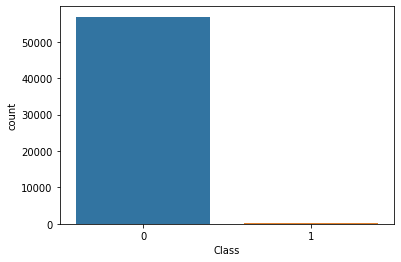

In [119]:
sns.countplot(x=XGBC_prediction_test.Class) # Original test Data
XGBC_prediction_test.Class.value_counts()

0    56878
1       84
Name: Predicted_Class, dtype: int64

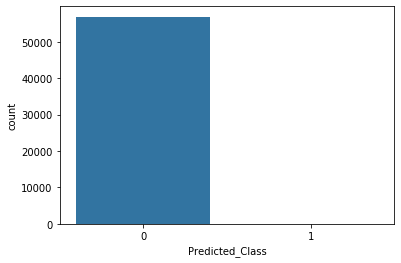

In [120]:
sns.countplot(x=XGBC_prediction_test.Predicted_Class) # Predicted test Data
XGBC_prediction_test.Predicted_Class.value_counts()

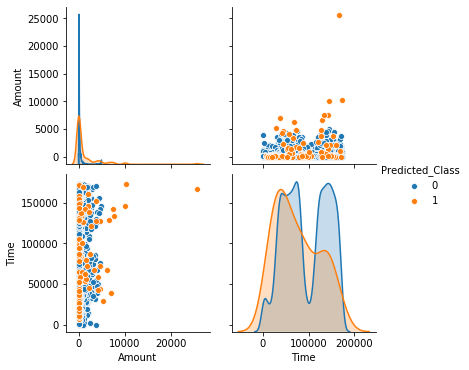

In [121]:
sns.pairplot(iforest_prediction_test,x_vars=['Amount','Time'],y_vars=['Amount','Time'],kind='scatter',hue='Predicted_Class')

#### Lets visualize how the score values are distributed for FRAUD transaction from Isolation Forest

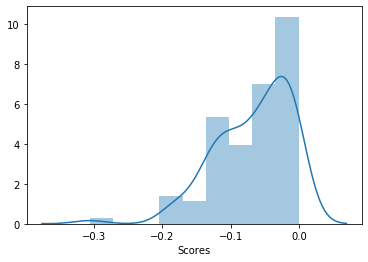

In [146]:
#lets visualize how the score values are distributed for FRAUD transaction from Isolation Forest
sns.distplot(iforest_prediction_test[iforest_prediction_test.Predicted_Class==1].Scores)

In [142]:
iforest_prediction_test[iforest_prediction_test.Predicted_Class==1].Scores.describe() # FRAUD Transaction

count    105.000000
mean      -0.067709
std        0.055909
min       -0.306378
25%       -0.104266
50%       -0.059809
75%       -0.017128
max       -0.000606
Name: Scores, dtype: float64

#### Lets visualize how the score values are distributed for NON-FRAUD transaction from Isolation Forest

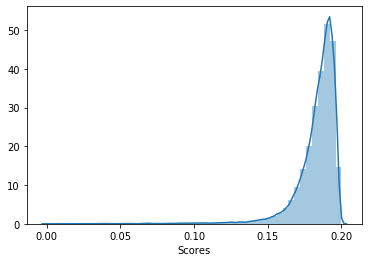

In [145]:
#lets visualize how the score values are distributed for NON-FRAUD transaction from Isolation Forest
sns.distplot(iforest_prediction_test[iforest_prediction_test.Predicted_Class==0].Scores)

In [147]:
iforest_prediction_test[iforest_prediction_test.Predicted_Class==0].Scores.describe() # NON-FRAUD Transaction

count    56857.000000
mean         0.183175
std          0.015210
min          0.000279
25%          0.179292
50%          0.186952
75%          0.191973
max          0.199998
Name: Scores, dtype: float64

### Observation:
    From above visualization, we can safely assume that the threshold value for marking or reporting a transaction 
    as fraudulent in our anomaly detection system can be around mean value of the score which is anything less than -0.068 

In [144]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
iforest_prediction_test[iforest_prediction_test.Predicted_Class==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted_Class,Scores
40,146140.0,-6.133493,1.371835,-5.770578,-2.384282,-9.622621,13.470790,-0.795775,-18.592913,-2.399328,-4.778083,-0.869835,0.958136,-0.703806,2.096236,0.639514,1.898168,-0.008576,1.589432,-2.654056,0.193376,-10.233407,3.008718,-0.828517,1.021715,-1.868893,1.133050,2.236081,-1.378523,2031.02,0,1,-0.015933
550,32610.0,-7.189655,6.978507,-3.642243,-0.125557,-1.950690,7.518234,-14.834807,-34.535000,-2.837788,-5.139350,-0.485479,4.133542,-1.564512,4.959964,-0.504797,2.441416,1.088824,0.473675,-1.701352,5.755105,-7.937783,1.498444,3.146670,-1.671991,0.284759,0.123243,-0.123494,0.580233,3.68,0,1,-0.016937
653,141812.0,-34.614374,-29.145460,-14.985962,7.677798,-8.846632,5.571214,13.167616,-4.717060,6.091319,4.347796,3.054225,1.005763,3.110310,-2.610117,4.441177,5.021881,-1.679253,-3.138214,1.751576,-20.235060,-8.172558,-1.323059,-3.329551,0.452444,2.410307,0.580394,-1.363536,15.632689,1417.29,0,1,-0.130994
1847,28143.0,-27.143678,15.365804,-28.407424,6.370895,-20.087878,-4.666313,-18.709479,17.903574,-3.722279,-8.120962,4.419943,-6.210941,1.063837,-5.843528,-0.108836,-5.606597,-11.756256,-4.714947,0.783578,1.703888,1.796826,-1.960974,-0.902247,0.144011,2.024388,-0.204214,1.332153,0.385891,99.99,1,1,-0.082556
2148,42909.0,-15.666324,-19.143284,1.091753,7.374308,17.370895,-8.608727,-13.375953,-1.284360,1.067369,2.548647,1.577101,1.416477,-0.693543,1.125977,2.684422,0.297970,0.430156,-1.005922,-0.671582,-2.587058,-1.984100,1.270096,2.522662,-1.034175,-0.052487,0.547636,2.973355,-1.070852,10.62,0,1,-0.013347
2271,171234.0,-16.224299,12.730564,-12.841065,-1.141867,-8.986583,-3.077067,-8.219623,10.713656,2.367518,4.536268,-3.962664,3.780793,0.598057,6.122479,0.170371,1.911043,3.533903,0.583581,-1.135103,1.285604,0.427780,0.263553,1.551892,-0.142470,1.436109,-0.035261,0.524327,0.882698,3.82,0,1,-0.011149
3060,55614.0,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,-3.740598,-8.332863,5.763189,-8.707879,-1.716949,-9.577194,0.146369,-7.586491,-12.503931,-4.375631,2.465195,0.073164,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,0.83,1,1,-0.021671
3801,41237.0,-10.281784,6.302385,-13.271718,8.925115,-9.975578,-2.832513,-12.703253,6.706846,-7.078424,-12.805683,6.786058,-13.064240,1.179525,-13.694873,0.951479,-10.954286,-20.583593,-7.517262,2.872354,-0.247648,2.479414,0.366933,0.042805,0.478279,0.157771,0.329901,0.163504,-0.485552,118.30,1,1,-0.087566
4098,160444.0,-28.623353,-19.262983,-13.042666,11.027770,-14.710239,9.042659,12.143391,-2.818318,5.376427,6.556983,0.838451,0.162703,2.226394,-2.967565,2.413155,4.622756,-0.921336,-0.567711,3.076979,-15.251547,-6.511789,-0.416771,-10.288551,1.315177,0.274091,0.189539,-6.007981,14.929133,2074.69,0,1,-0.126549
5225,133010.0,-23.103244,-23.866465,-5.699313,6.503369,11.184636,-6.196146,-6.909951,-1.785498,3.373336,2.718968,1.627024,2.458631,1.442617,0.252405,2.411592,1.747117,-0.012168,-2.989766,0.902210,-12.738325,-4.324577,-2.267901,-19.056701,1.151152,-2.977135,0.481818,7.138240,-7.756345,593.48,0,1,-0.090954
